In [8]:
import geopandas as gpd
import praw
from praw.models import MoreComments
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from psaw import PushshiftAPI

In [9]:
world_shape = gpd.read_file(r'world.shp')
world_shape = world_shape[['NAME', 'geometry']]


#remove antarctica
world_shape = world_shape[world_shape['NAME'] != 'Antarctica']

#change projection
world_shape.to_crs(epsg = 3857, inplace = True)

world_data = pd.read_csv('world.csv', sep=',')
world_data = world_data[['name','alpha3']]

#matching country names in shape file and csv file
world_data.replace('Bolivia (Plurinational State of)','Bolivia', inplace = True)

world_data.replace("Korea (Democratic People's Republic of)","Korea, Democratic People's Republic of", inplace = True)

world_data.replace('Micronesia (Federated States of)','Micronesia, Federated States of', inplace = True)
world_data.replace('Moldova, Republic of','Republic of Moldova', inplace = True)
world_data.replace('Tanzania, United Republic of','United Republic of Tanzania', inplace = True)
world_data.replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom', inplace = True)
world_data.replace('Venezuela (Bolivarian Republic of)','Venezuela', inplace = True)
world_data.replace('Eswatini','Swaziland', inplace = True)
world_data.replace("Palestine, State of",'Palestine', inplace = True)
world_data.replace("Côte d'Ivoire","Cote d'Ivoire", inplace = True)
world_data.replace('Cabo Verde',"Cape Verde", inplace = True)
world_data.replace('United States of America',"United States", inplace = True)
world_data.replace('Russian Federation', 'Russia', inplace = True)
world_data.replace('Holy See', "Holy See (Vatican City)", inplace = True)
world_data.replace('Réunion', "Reunion", inplace = True)
world_data.replace('Taiwan, Province of China', "Taiwan", inplace = True)
world_data.replace('Libya', "Libyan Arab Jamahiriya", inplace = True)
world_data.replace('Macao', "Macau", inplace = True)
world_data.replace('Congo, Democratic Republic of the', "Democratic Republic of the Congo", inplace = True)
world_data.replace('Czechia', "Czech Republic", inplace = True)
world_data.replace('Myanmar', "Burma", inplace = True)
world_data.replace('Pitcairn', "Pitcairn Islands", inplace = True)
world_data.replace('Saint Helena, Ascension and Tristan da Cunha', "Saint Helena", inplace = True)
world_data.replace('Åland Islands', "Ãland Islands", inplace = True)
world_data.replace('Svalbard and Jan Mayen', "Svalbard", inplace = True)
world_data.replace('Saint Martin (French part)', "Saint Martin", inplace = True)
world_data.replace('French Southern Territories', "French Southern and Antarctic Lands", inplace = True)
world_data.replace('Virgin Islands (British)', "British Virgin Islands", inplace = True)
world_data.replace('Virgin Islands (U.S.)', "United States Virgin Islands", inplace = True)
world_data.replace('Wallis and Futuna', "Wallis and Futuna Islands", inplace = True)
world_data.replace('Saint Barthélemy', "Saint Barthelemy", inplace = True)
world_data.replace('South Georgia and the South Sandwich Islands', "South Georgia South Sandwich Islands", inplace = True)
world_data.replace('North Macedonia', "The former Yugoslav Republic of Macedonia", inplace = True)



world_list = world_data['name'].tolist()

counter = []
for items in world_list:
    counter.append(0)

world_data['Counter'] = counter



In [10]:
#insert your API details here

reddit = praw.Reddit(client_id="xxxxxx",
                    client_secret="xxxxxx",
                    username="xxxxxx",
                    password="xxxxxx",
                    user_agent="Countries Least Likely To Receive Revisits by u/BogosortBestSort")

#https://www.reddit.com/r/AskReddit/comments/om38bx/what_is_one_country_that_you_will_never_visit/
#https://www.reddit.com/r/AskReddit/comments/omnrxb/what_is_one_country_you_will_gladly_visit_again/

submission = reddit.submission(id="om38bx")


In [11]:
#Countries often referred to by another name

def renamer(country):
    if country == 'Czechia':
        return "Czech Republic"
    if country == "England":
        return 'United Kingdom'
    if country == "Scotland":
        return 'United Kingdom'
    if country == "UAE":
        return "United Arab Emirates"
    if country == "The United States":
        return "United States of America"
    if country == "The US":
        return "United States of America"
    if country == 'Bolivia (Plurinational State of)': 
        return 'Bolivia'
    if country == 'Iran (Islamic Republic of)': 
        return 'Iran'
    if country == "Korea (Democratic People's Republic of)": 
        return "Korea, Democratic People's Republic of"
    if country == "North Korea": 
        return "Korea, Democratic People's Republic of"
    if country == 'Korea, Republic of': 
        return 'South Korea'
    if country == "Laos": 
        return "Lao People's Democratic Republic"
    if country == 'Micronesia (Federated States of)': 
        return 'Micronesia, Federated States of'
    if country == 'Micronesia': 
        return 'Micronesia, Federated States of'
    if country == 'Moldova, Republic of': 
        return 'Republic of Moldova'
    if country == 'Moldova': 
        return 'Republic of Moldova'
    if country == 'Tanzania, United Republic of': 
        return 'United Republic of Tanzania'
    if country == 'Tanzania': 
        return 'United Republic of Tanzania'
    if country == 'United Kingdom of Great Britain and Northern Ireland': 
        return 'United Kingdom'
    if country == 'Venezuela (Bolivarian Republic of)': 
        return 'Venezuela'
    if country == 'Eswatini': 
        return 'Swaziland'
    if country == 'Palestine, State of': 
        return 'Palestine'  
    if country == "Côte d'Ivoire": 
        return "Cote d'Ivoire"
    if country == "Cabo Verde": 
        return "Cape Verde"
    if country == 'Russian Federation': 
        return 'Russia'
    if country == 'Palestine, State of': 
        return 'Palestine'
    if country == 'Holy See':
        return "Holy See (Vatican City)"
    if country == 'Vatican City':
        return "Holy See (Vatican City)"
    if country == 'The Vatican':
        return "Holy See (Vatican City)"
    if country == "Réunion":
        return 'Reunion'
    if country == "Taiwan, Province of China":
        return 'Taiwan'
    if country == "Libya":
        return "Libyan Arab Jamahiriya"
    if country == "Macao":
        return "Macau"
    if country == "Congo, Democratic Republic of the":
        return "Democratic Republic of the Congo"
    if country == 'Myanmar': 
        return 'Burma'
    if country == 'Pitcairn': 
        return 'Pitcairn Islands'
    if country == "Saint Helena, Ascension and Tristan da Cunha": 
        return "Saint Helena"
    if country == "Åland Islands": 
        return "Ãland Islands"
    if country == 'Svalbard and Jan Mayen': 
        return 'Svalbard'
    if country == "Saint Martin (French part)": 
        return 'Saint Martin'
    if country == 'French Southern Territories': 
        return 'French Southern and Antarctic Lands'
    if country == 'Virgin Islands (British)': 
        return 'British Virgin Islands'
    if country == 'Virgin Islands (U.S.)': 
        return 'United States Virgin Islands'
    if country == 'Wallis and Futuna': 
        return 'Wallis and Futuna Islands'
    if country == 'Saint Barthélemy': 
        return 'Saint Barthelemy'
    if country == 'South Georgia and the South Sandwich Islands': 
        return 'South Georgia South Sandwich Islands'
    if country == 'North Macedonia': 
        return 'The former Yugoslav Republic of Macedonia'
    
    
alt_list = ["Czechia", 
            'England', 
            'Scotland', 
            "The United States", 
            'UAE', 
            "The US", 
            'Bolivia (Plurinational State of)',
            'Iran (Islamic Republic of)',
            "North Korea", 
            'South Korea', 
            "Laos", 
            'Micronesia (Federated States of)', 'Micronesia', 
            'Moldova, Republic of', 'Moldova',
            'Tanzania, United Republic of', 'Tanzania',
            'United Kingdom of Great Britain and Northern Ireland',
            'Venezuela (Bolivarian Republic of)',
            'Eswatini',
            'Palestine, State of',
            'Holy See', 'Vatican City', 'The Vatican',
            "Réunion",
            "Taiwan, Province of China",
            "Libya",
            "Macao", 
            "Congo, Democratic Republic of the", 
            'Myanmar', 
            'Pitcairn', 
            "Saint Helena, Ascension and Tristan da Cunha", 
            "Åland Islands", 
            'Svalbard and Jan Mayen', 
            "Saint Martin (French part)", 
            'French Southern Territories',
            'Virgin Islands (British)',
            'Virgin Islands (U.S.)', 
            'Wallis and Futuna', 
            'Saint Barthélemy', 
            'South Georgia and the South Sandwich Islands',
            'North Macedonia'
           ]



In [12]:
#searching through comments.
#replace the limit count to yield faster results or obtain more data

submission.comments.replace_more(limit=998)
for top_level_comment in submission.comments:
    cbody = top_level_comment.body
    for keyw in world_list:
        if keyw in cbody:
            world_data.loc[world_data.name == keyw, "Counter"] += 1
            
    for keys in alt_list:
        if keys in cbody:
            changedKey = (renamer(keys))
            world_data.loc[world_data.name == changedKey, "Counter"] += 1
            

In [13]:
world_shape.rename(columns = {'NAME': 'name'}, inplace = True)

merged = world_shape.merge(world_data, on = 'name')

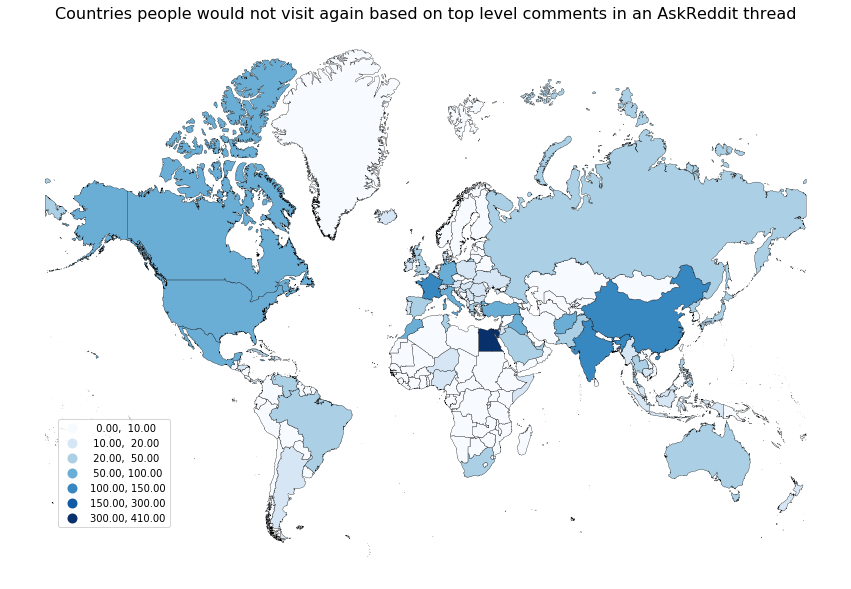

In [14]:
plotMap = merged.plot(column = 'Counter', 
            cmap='Blues',
            edgecolor='black',
            linewidth = 0.3,
            scheme='user_defined',
            classification_kwds = {'bins': [10,20,50,100,150,300]},
            legend = True, 
            figsize=(15, 15), 
            )

plotMap.set_title('Countries people would not visit again based on top level comments in an AskReddit thread',
                 fontdict = {'fontsize': 16},
                 pad = 5)
plotMap.set_axis_off()

plotMap.get_legend().set_bbox_to_anchor((0.2, 0.3))